<a href="https://colab.research.google.com/github/Bojan971/ml-product-category-classifier-project/blob/main/notebooks/product_category_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Product Category Classification

In this project, we aim to build a machine learning model that automatically predicts the category of a product based on its title.
This is a common challenge for online retailers who need to categorize thousands of products daily.
The model will help reduce manual work, speed up product onboarding, and improve user experience.

## Loading and inspecting the dataset

Before diving into analysis, we first need to load the dataset and take a look at its structure.

In this step, we will:
- Load the CSV file from GitHub
- Check how many rows and columns we have
- Display the first few rows
- Review data types and basic metadata for each column

This will help us ensure the dataset is correctly loaded and ready for further exploration.

In [2]:
import pandas as pd

# Load dataset from GitHub:
url = "https://raw.githubusercontent.com/Bojan971/ml-product-category-classifier-project/main/data/products.csv"
df = pd.read_csv(url)

# Print shape (number of rows and columns):
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows:
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts:
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (35311, 8)

First 5 rows:


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


## Checking for missing values

Missing data can cause problems during model training or analysis.
Here, we will:
- Count the number of missing (NaN) values per column
- Visualize missing values using a heatmap

This will help us identify any columns that require cleaning or imputation.

In [3]:
# Count missing values per column:
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


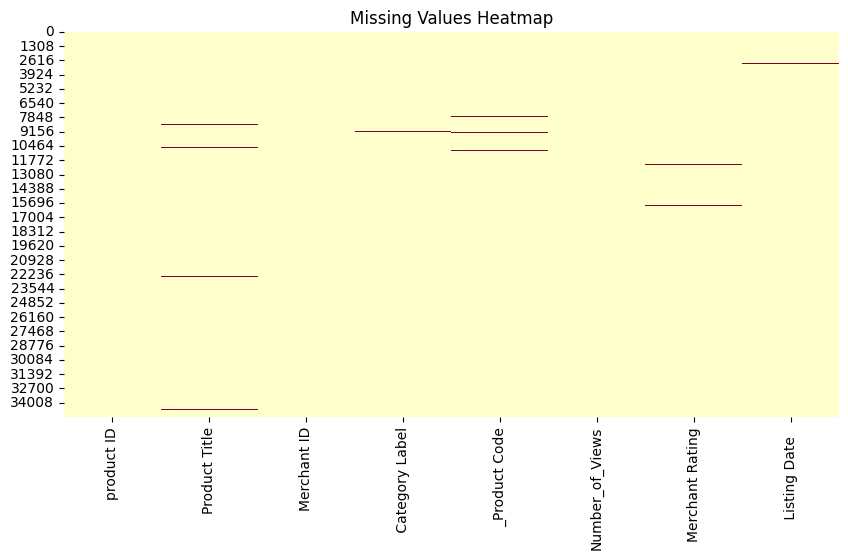

In [4]:
# Visualize missing data with seaborn heatmap:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

## Removing missing values

We already analyzed missing data in the previous step.
Now we will simply drop all rows that contain missing values,
and check the new shape and count missing values per column.

In [5]:
# Drop all rows with missing values:
df = df.dropna()

# Display new shape of the dataset:
print("New dataset shape:", df.shape)

# Count missing values per column:
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (34760, 8)
Missing values per column:
product ID         0
Product Title      0
Merchant ID        0
 Category Label    0
_Product Code      0
Number_of_Views    0
Merchant Rating    0
 Listing Date      0
dtype: int64


## Creating a new features - title_length and word_count

We will start simple with TF-IDF features from product titles.
We'll also create additional features such as title length and word count.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new columns:
df = df.copy()

df["title_length"] = df["Product Title"].apply(len)
df["word_count"] = df["Product Title"].apply(lambda x: len(x.split()))

df[["Product Title", "title_length", "word_count"]].head()



,Product Title,title_length,word_count
0,apple iphone 8 plus 64gb silver,31,6
1,apple iphone 8 plus 64 gb spacegrau,35,7
2,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,70,13
3,apple iphone 8 plus 64gb space grey,35,7
4,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,54,11


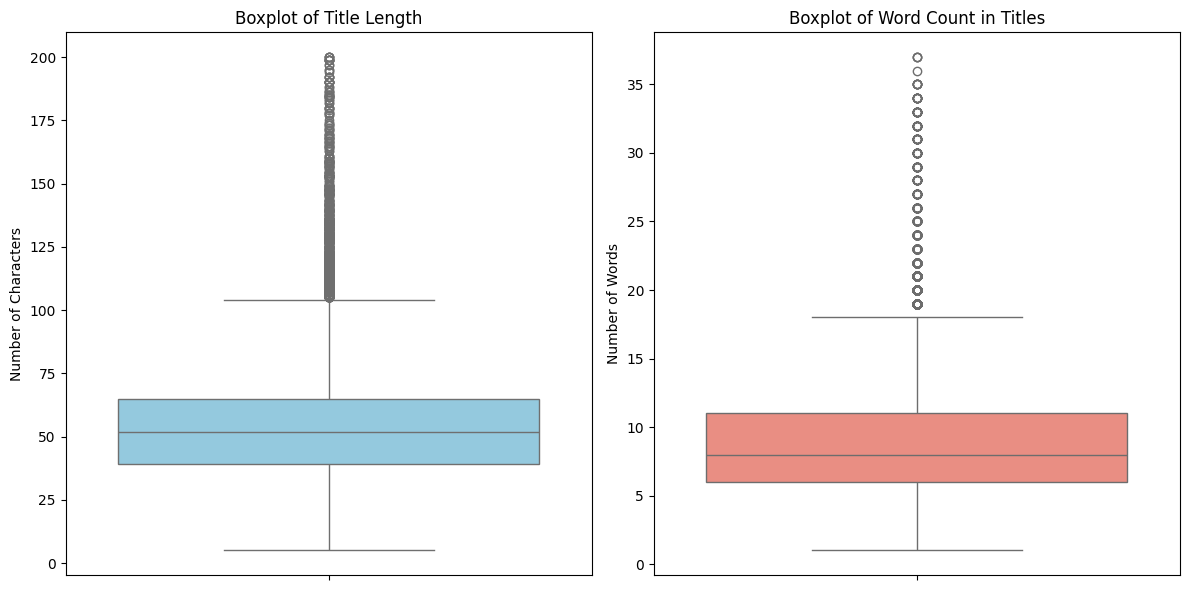

In [7]:
# Visual distribution of the title_length and the number of characters:
# Visual distribution of the word_count and the number of words:

plt.figure(figsize=(12,6))

# Boxplot for title_length
plt.subplot(1, 2, 1)
sns.boxplot(y=df["title_length"], color="skyblue")
plt.title("Boxplot of Title Length")
plt.ylabel("Number of Characters")

# Boxplot for word_count
plt.subplot(1, 2, 2)
sns.boxplot(y=df["word_count"], color="salmon")
plt.title("Boxplot of Word Count in Titles")
plt.ylabel("Number of Words")

plt.tight_layout()
plt.show()

## Removing columns that have no significant impact on model training and evaluation

Analyzing the statistical data, we came to the conclusion that the columns 'product ID', 'Merchant ID', '_Product Code', 'Number_of_Views', 'Merchant Rating' and 'Listing Date' does not have a significant influence on the column 'Categoty Label' and therefore we will remove them so that they do not cause us problems in the form of sums during modeling.

The key features we want to keep are:
- "Product Title"
- "title_length"
- "word_count"
- "Category Label"

In [8]:
# Drop columns which are not useful for modeling:

df.columns = df.columns.str.strip()

df = df.drop(columns=['Listing Date'])

#df = df.drop(columns=['product ID', 'Merchant ID', '_Product Code', 'Number_of_Views', 'Merchant Rating'])

# Preview remaining columns:
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['product ID', 'Product Title', 'Merchant ID', 'Category Label', '_Product Code', 'Number_of_Views', 'Merchant Rating', 'title_length', 'word_count']


## Training and Comparing Multiple Machine Learning Models

Now, we will train and evaluate several different machine learning models in order to find the best one for our classification task.

we will go through the following steps:
- Split the dataset into **training and test sets**.
- Prepare the data by:
    - transforming the text to numbers using **TF-IDF**.
    - scaling the 'title_length' and 'word_count' columns using **MinMaxScaler**.
- Use a **Column Transformer** to combine all features into a single input matrix.
- Define and train **five different classification algorithms**.
- Wrap all components into a unified **Pipeline** for each model.
- Evaluate model performance using **classification reports**.

By the end, we will be able to compare the strengths and weaknesses of different algorithms and select the most suitable one for our project.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Features and label:
X = df[["Product Title", "title_length", "word_count"]]
y = df["Category Label"]

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# Preprocessor: TF-IDF for text, MinMaxScaler for numeric feature:
preprocessor = ColumnTransformer(
    transformers=[
        ("title", TfidfVectorizer(), "Product Title"),
        ("word", MinMaxScaler(), ["word_count"]),
        ("length", MinMaxScaler(), ["title_length"])
    ]
)


# List of classifiers:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": LinearSVC()
}

# Train and evaluate:
for name, model in models.items():
    print(f"\n {name}")
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))



Train size: 27808
Test size: 6952

 Logistic Regression
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        16
            CPUs       0.98      1.00      0.99       742
 Digital Cameras       1.00      0.99      0.99       532
     Dishwashers       0.89      0.96      0.93       675
        Freezers       0.99      0.92      0.95       436
 Fridge Freezers       0.94      0.93      0.94      1085
         Fridges       0.88      0.89      0.89       681
      Microwaves       0.99      0.96      0.98       461
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.96      0.98      0.97       794
             TVs       0.97      0.99      0.98       701
Washing Machines       0.95      0.95      0.95       794
          fridge       0.00      0.00      0.00        24

        accuracy                           0.95      6952
       macro avg       0.73      0.74      0.74      6952
    weighted a

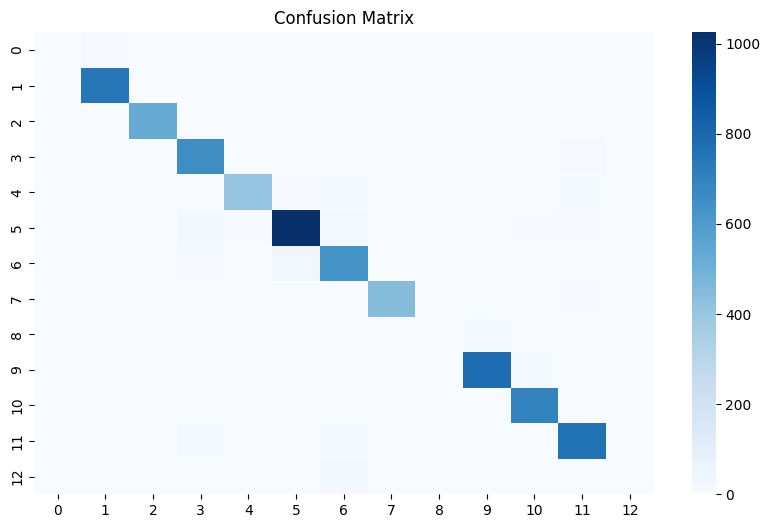

In [14]:
# Visual representation of the Confusion Matrix:

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=False, cbar=True)
plt.title("Confusion Matrix")
plt.show()